# **Wildermart**

#### **Load Library**

In [1]:
library(readxl)
library(tidyverse)
library(lubridate)
library(DataExplorer)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




## **A. Explore Inventory**

#### **Data Inspections**

In [2]:
inventory <- read_excel("C://Users//PC Dekstop//OneDrive - Universitas Terbuka//Desktop//Wildermart//zom_inventory_1feb.xls", skip=1)

In [3]:
head(inventory)

item_id,sku,item_name,category_id,category_name,unit,is_combo_product,quantity_purchased,quantity_sold,quantity_ordered,quantity_demanded,quantity_available,quantity_available_for_sale,reorder_level,Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
449091000000415837,BASO000890,10 Grains & Seeds Sourdough Sandwich Loaf,-1,Others,Pcs,false,6,4,0,4,2,-2,1,active
449091000000413242,PASN000501,100% Wheat Golgappa,-1,Others,Pcs,false,25,19,3,7,6,-1,1,active
449091000002649839,NA,100% Wheat Golgappa/Default Title,-1,Others,NA,false,0,0,0,0,0,0,NA,inactive
449091000001757804,PACH001264,41% Mylk Couverture Chocolate,-1,Others,pcs,false,7,1,0,0,6,6,NA,active
449091000000413570,PACH000565,49% Crunchy Peanut Butter Chocolate Bar,-1,Others,Pcs,false,15,3,0,2,12,10,1,active
449091000000415774,BASO000883,5 Seeds Sourdough Bread,-1,Others,Pcs,false,26,5,0,1,21,20,1,active


In [4]:
str(inventory)

tibble [1,494 x 15] (S3: tbl_df/tbl/data.frame)
 $ item_id                    : chr [1:1494] "449091000000415837" "449091000000413242" "449091000002649839" "449091000001757804" ...
 $ sku                        : chr [1:1494] "BASO000890" "PASN000501" NA "PACH001264" ...
 $ item_name                  : chr [1:1494] "10 Grains & Seeds Sourdough Sandwich Loaf" "100% Wheat Golgappa" "100% Wheat Golgappa/Default Title" "41% Mylk Couverture Chocolate" ...
 $ category_id                : chr [1:1494] "-1" "-1" "-1" "-1" ...
 $ category_name              : chr [1:1494] "Others" "Others" "Others" "Others" ...
 $ unit                       : chr [1:1494] "Pcs" "Pcs" NA "pcs" ...
 $ is_combo_product           : chr [1:1494] "false" "false" "false" "false" ...
 $ quantity_purchased         : num [1:1494] 6 25 0 7 15 26 2 4 19 11 ...
 $ quantity_sold              : num [1:1494] 4 19 0 1 3 5 1 2 4 11 ...
 $ quantity_ordered           : num [1:1494] 0 3 0 0 0 0 0 0 0 0 ...
 $ quantity_demanded      

In [5]:
introduce(inventory)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1494,15,8,7,0,545,1007,22410,514656


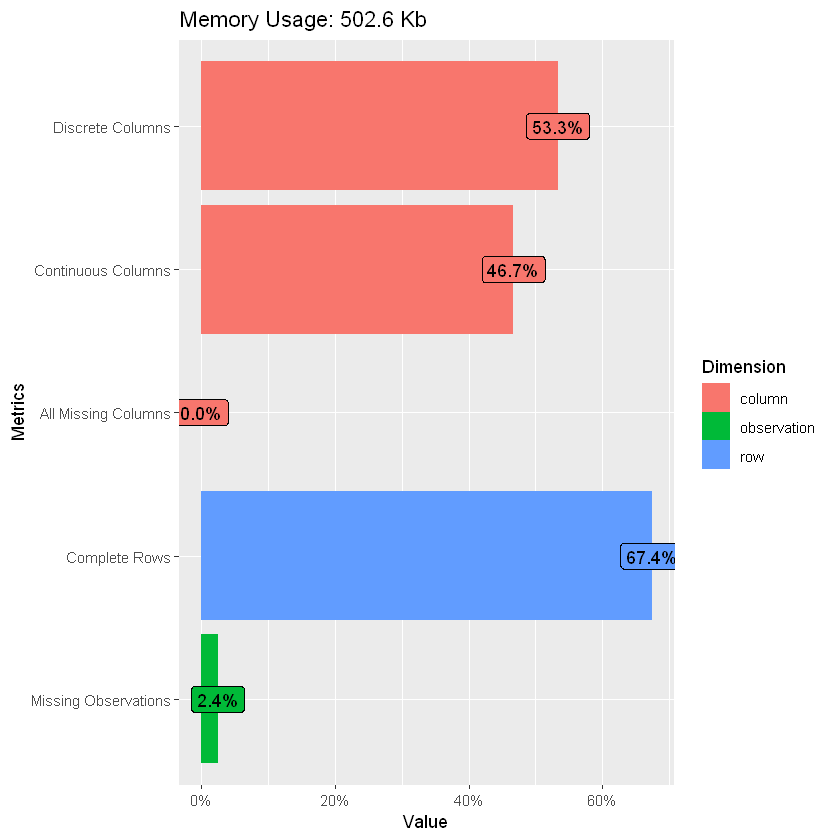

In [6]:
plot_intro(inventory)

Noticed there are 2.4 % of total missing Observations and there is no missing column. The missing observations are not too significant, so we can continue to analyse the data.

#### **Analyzing Data**

##### **1) List of Top demanded products**

In [7]:
top_demand <- inventory %>% select(sku,item_name,quantity_demanded)%>% arrange(desc(quantity_demanded)) %>% print(n=20)

# A tibble: 1,494 x 3
   sku        item_name                      quantity_demanded
   <chr>      <chr>                                      <dbl>
 1 FVBK000130 Organic Lemon                               206 
 2 FVBK000009 Organic Ash Gourd                           200.
 3 FVBK000226 Organic Yelakki Banana                      176.
 4 FVBK000095 Organic Ginger                              175.
 5 FVBK000153 Organic Onion                               174 
 6 FVBK000215 Organic Nati Tomatoes                       173 
 7 FVBK000071 Organic Cucumber                            168.
 8 FVBK000172 Organic Pumpkin                             163 
 9 FVBK000170 Organic Potato                              144 
10 FVBK000099 Organic Green Chilli                        132 
11 FVBK000225 Organic Yam                                 129.
12 FVBK000022 Organic Beetroot                            126.
13 FVBK000127 Organic Ladies Finger / Bhindi              126.
14 FVBK000154 Organic Ooty Carrot

*We noticed that demand market in organic fruit and vegetables products are significant.*

In [8]:
colnames(inventory)

[1] "item_id"                     "sku"                        
 [3] "item_name"                   "category_id"                
 [5] "category_name"               "unit"                       
 [7] "is_combo_product"            "quantity_purchased"         
 [9] "quantity_sold"               "quantity_ordered"           
[11] "quantity_demanded"           "quantity_available"         
[13] "quantity_available_for_sale" "reorder_level"              
[15] "Status"

##### **2) Supply and Demand level**

In [9]:
inventory %>% select(sku,item_name,quantity_demanded,quantity_available_for_sale)%>% arrange(desc(quantity_demanded)) %>% print(n=20)

# A tibble: 1,494 x 4
   sku        item_name                      quantity_demanded quantity_availab~
   <chr>      <chr>                                      <dbl>             <dbl>
 1 FVBK000130 Organic Lemon                               206            -191   
 2 FVBK000009 Organic Ash Gourd                           200.            -28.1 
 3 FVBK000226 Organic Yelakki Banana                      176.            -97.6 
 4 FVBK000095 Organic Ginger                              175.             35.7 
 5 FVBK000153 Organic Onion                               174            -129.  
 6 FVBK000215 Organic Nati Tomatoes                       173            -116.  
 7 FVBK000071 Organic Cucumber                            168.            -93.9 
 8 FVBK000172 Organic Pumpkin                             163              -7.4 
 9 FVBK000170 Organic Potato                              144            -101.  
10 FVBK000099 Organic Green Chilli                        132              63.2 
11 FVB

We noticed that the company needs to pay more attention in order to maintain the availability of the products, specially the top demanded products

##### **3. List of Top Product Sales**

In [10]:
inventory %>% select(sku,item_name,quantity_sold) %>% arrange(desc(quantity_sold)) %>% print(n=10)

# A tibble: 1,494 x 3
   sku        item_name               quantity_sold
   <chr>      <chr>                           <dbl>
 1 FVBK000130 Organic Lemon                    691 
 2 FVBK000158 Organic Papaya                   364.
 3 FVBK000153 Organic Onion                    348.
 4 FVBK000215 Organic Nati Tomatoes            343.
 5 FVBK000221 Organic Watermelon               306 
 6 FVBK000170 Organic Potato                   286.
 7 FVBK000102 Organic Raw Banana               238 
 8 FVBK000226 Organic Yelakki Banana           228.
 9 FVBK000064 Organic Coconut                  216 
10 FVBK000200 Organic Spinach / Palak          202 
# ... with 1,484 more rows


We noticed that Organic Lemon have the best sales achievement compare to the other product and the second best sales achievement is papaya, it means market are demand on fruit is high therefor company need to think how to add more variant of organic fruit products on the shelves.

##### **4) Order Level**

In [11]:
order_lvl <- inventory %>% select(sku,item_name,quantity_ordered,quantity_demanded,Status) %>% arrange(desc(quantity_demanded))
head(order_lvl)

sku,item_name,quantity_ordered,quantity_demanded,Status
<chr>,<chr>,<dbl>,<dbl>,<chr>
FVBK000130,Organic Lemon,0.2,206.00,active
FVBK000009,Organic Ash Gourd,0.0,200.25,active
FVBK000226,Organic Yelakki Banana,4.5,176.50,active
FVBK000095,Organic Ginger,1.4,175.40,active
FVBK000153,Organic Onion,0.4,174.00,active
FVBK000215,Organic Nati Tomatoes,0.1,173.00,active


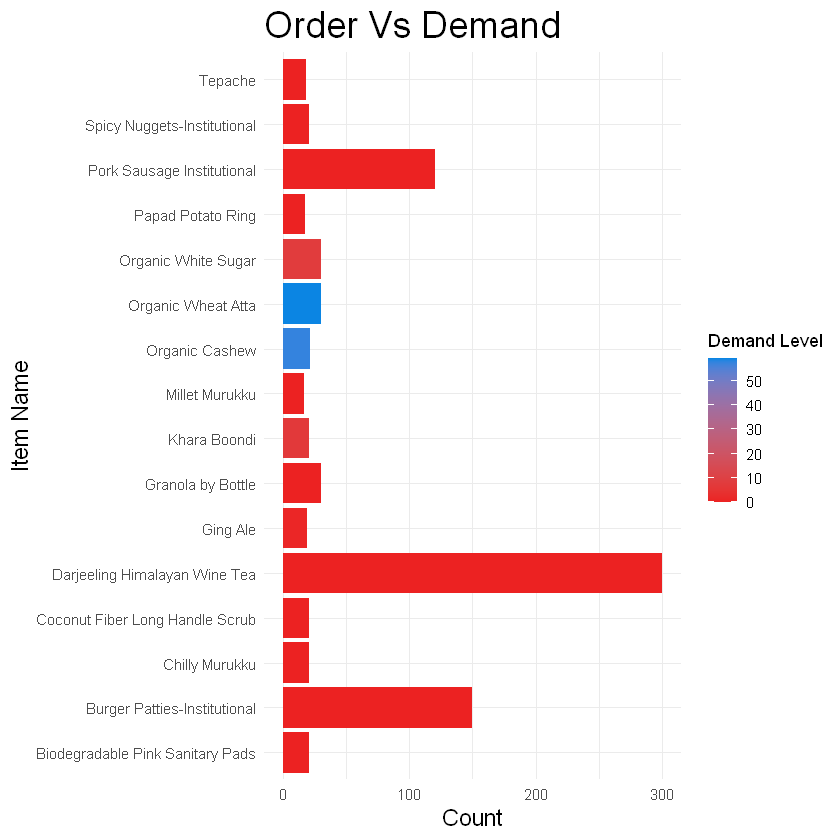

In [12]:
order_lvl %>%
 filter(quantity_ordered >= 16L & quantity_ordered <= 300L & !is.na(quantity_ordered)) %>%
 filter(!is.na(quantity_demanded)) %>%
 filter(!is.na(Status)) %>%
 ggplot() +
  aes(
    x = item_name,
    fill = quantity_demanded,
    weight = quantity_ordered
  ) +
  geom_bar() +
  scale_fill_gradient(low = "#EC2222", high = "#0B85E3") +
  labs(
    x = "Item Name",
    y = "Count",
    title = "Order Vs Demand",
    fill = "Demand Level"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 22L),
    axis.title.y = element_text(size = 14L),
    axis.title.x = element_text(size = 14L)
  )

##### **5. Item Status**

In [13]:
item_status<- inventory %>% select(sku,item_name,Status) %>% count(Status)
head(item_status)

Status,n
<chr>,<int>
active,1459
inactive,34
NA,1


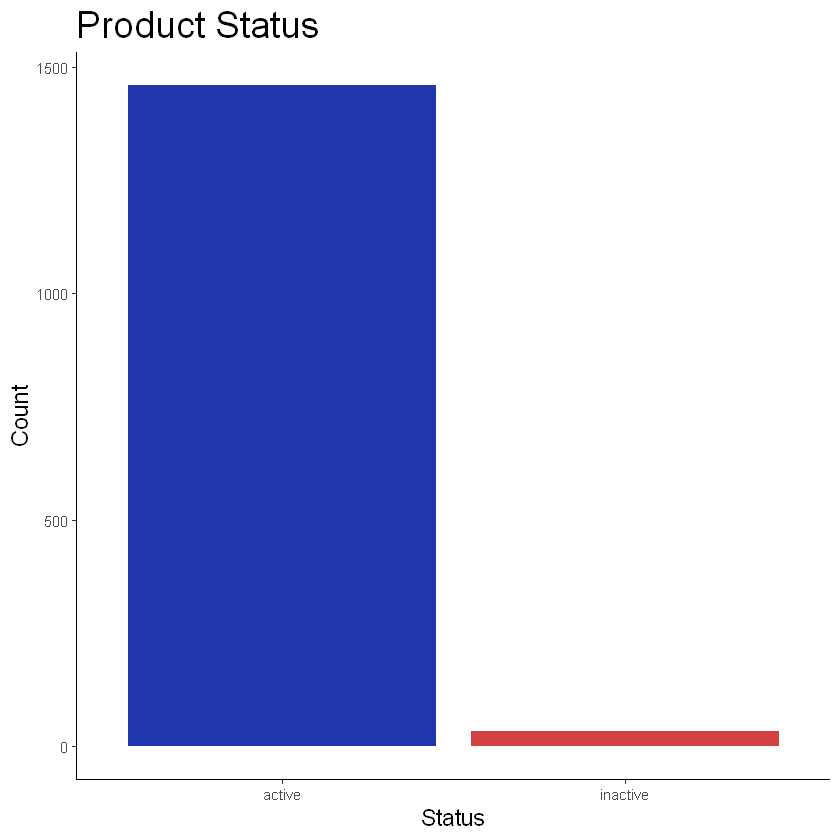

In [14]:
item_status %>%
 filter(n >= 10L & n <= 1460L) %>%
 ggplot() +
  aes(x = Status, fill = Status, weight = n) +
  geom_bar() +
  scale_fill_manual(
    values = c(active = "#2237AD",
    inactive = "#D24242")
  ) +
  labs(x = "Status", y = "Count", title = "Product Status") +
  theme_classic() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 22L),
    axis.title.y = element_text(size = 14L),
    axis.title.x = element_text(size = 14L)
  )

We noticed some inactive product. It is essential to analyse to know what is the reason this product become inactive: 
1) do the supplier still exist?
2) do their price are to high?
3) Is there any problems on the relationship or agreements?, and many more.

## **B. Explore Invoice**

#### **Data Inspections**

In [15]:
invoice <- read_excel("C://Users//PC Dekstop//OneDrive - Universitas Terbuka//Desktop//Wildermart//invoice_detailsJan30th.xls", skip=1)

In [16]:
head(invoice)

invoice_id,status,date,due_date,invoice_number,reference_number,customer_name,bcy_total,bcy_balance,salesperson_id,project_names,currency_code,currency_id,customer_id,price_precision,is_emailed,reminders_sent,exchange_rate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
449091000002396220,paid,2021-04-23,2021-05-23,INV-000037,SO-00055,SHWETA SHETTY,948,0,NA,NA,INR,449091000000000064,449091000000958280,2,false,0,1
449091000002742339,paid,2021-04-23,2021-04-23,INV-000049,SO-00056,Nakul M Dev,250,0,NA,NA,INR,449091000000000064,449091000000958214,2,false,0,1
449091000004203619,paid,2021-04-24,2021-05-24,INV-000827,SO-00062,Shivaraman S,141,0,NA,NA,INR,449091000000000064,449091000001915423,2,false,0,1
449091000002930579,paid,2021-04-25,2021-05-25,INV-000213,SO-00070,Vanika Khanna,467,0,NA,NA,INR,449091000000000064,449091000001915639,2,false,0,1
449091000002750598,paid,2021-04-27,2021-05-27,INV-000065,SO-00077,Shweta Thakur,415,0,NA,NA,INR,449091000000000064,449091000001915327,2,false,0,1
449091000007657215,paid,2021-04-29,2021-05-29,INV-001620,NA,Meena Naidu,4413,0,NA,NA,INR,449091000000000064,449091000001915927,2,false,0,1


In [17]:
str(invoice)

tibble [1,642 x 18] (S3: tbl_df/tbl/data.frame)
 $ invoice_id      : chr [1:1642] "449091000002396220" "449091000002742339" "449091000004203619" "449091000002930579" ...
 $ status          : chr [1:1642] "paid" "paid" "paid" "paid" ...
 $ date            : chr [1:1642] "2021-04-23" "2021-04-23" "2021-04-24" "2021-04-25" ...
 $ due_date        : chr [1:1642] "2021-05-23" "2021-04-23" "2021-05-24" "2021-05-25" ...
 $ invoice_number  : chr [1:1642] "INV-000037" "INV-000049" "INV-000827" "INV-000213" ...
 $ reference_number: chr [1:1642] "SO-00055" "SO-00056" "SO-00062" "SO-00070" ...
 $ customer_name   : chr [1:1642] "SHWETA SHETTY" "Nakul M Dev" "Shivaraman S" "Vanika Khanna" ...
 $ bcy_total       : num [1:1642] 948 250 141 467 415 ...
 $ bcy_balance     : num [1:1642] 0 0 0 0 0 0 0 0 0 0 ...
 $ salesperson_id  : logi [1:1642] NA NA NA NA NA NA ...
 $ project_names   : logi [1:1642] NA NA NA NA NA NA ...
 $ currency_code   : chr [1:1642] "INR" "INR" "INR" "INR" ...
 $ currency_id     : 

In [18]:
invoice$date <- as_date(invoice$date)
invoice$due_date <- as_date(invoice$due_date)

In [19]:
class(invoice$date)
class(invoice$due_date) 

[1] "Date"

[1] "Date"

In [20]:
introduce(invoice)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1642,18,11,5,2,4418,0,29556,616632


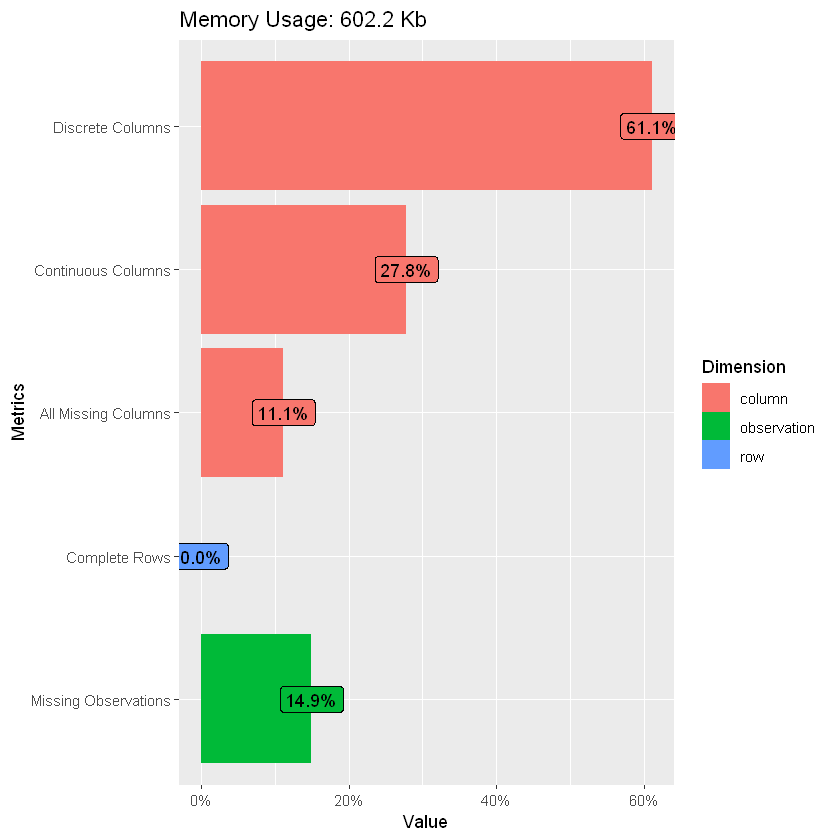

In [21]:
plot_intro(invoice)

We noticed there is 14.9 % missing observations. The dataset is still significant to use.

#### **Analyzing Data**

##### **1. Payment History by Customer ID**

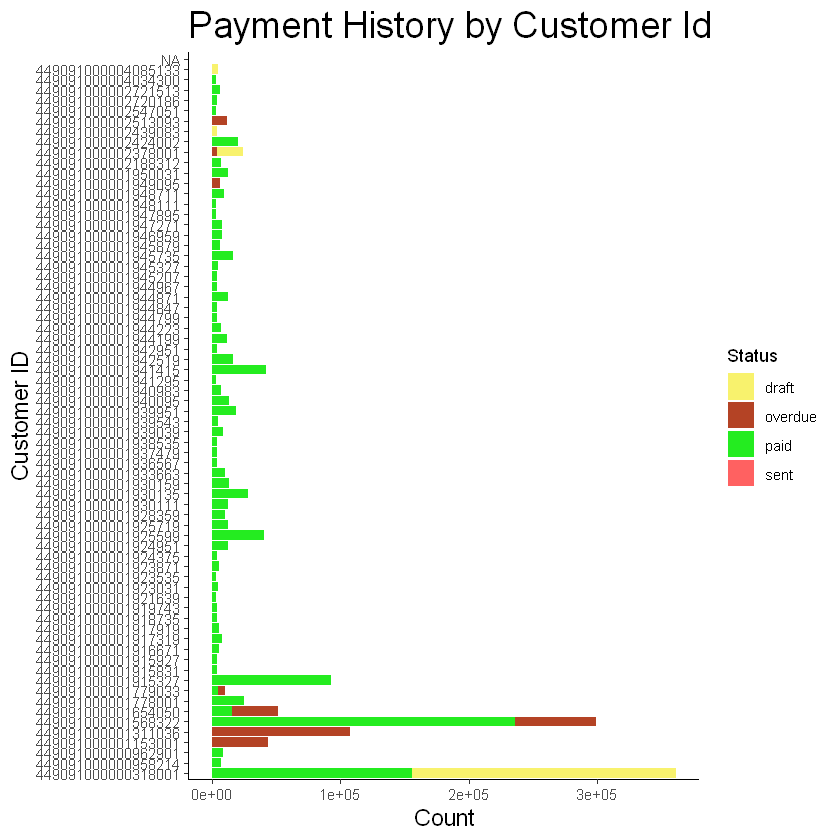

In [23]:
invoice %>%
 filter(bcy_total >= 3193L & bcy_total <= 150000L | is.na(bcy_total)) %>%
 ggplot() +
  aes(x = customer_id, fill = status, weight = bcy_total) +
  geom_bar() +
  scale_fill_manual(
    values = c(draft = "#F8F26D",
    overdue = "#B44325",
    paid = "#24EC20",
    sent = "#FF6161")
  ) +
  labs(
    x = "Customer ID",
    y = "Count",
    title = "Payment History by Customer Id",
    fill = "Status"
  ) +
  coord_flip() +
  theme_classic() +
  theme(
    plot.title = element_text(size = 22L),
    axis.title.y = element_text(size = 14L),
    axis.title.x = element_text(size = 14L)
  )

There are some customer with bad payment history indicating in "red" as overdue and without paid history.

##### **2) Top 10 Paid History by Customer ID**

In [50]:
paid_inv <- invoice %>% select(customer_id,customer_name,bcy_total,status) %>% arrange(desc(bcy_total)) %>% filter(status=="paid") 
paid_inv %>% print(n =10)

# A tibble: 1,588 x 4
   customer_id        customer_name            bcy_total status
   <chr>              <chr>                        <dbl> <chr> 
 1 449091000000318001 Karle Infra Pvt Ltd         150000 paid  
 2 449091000001568322 Rathat Solutions Pvt Ltd     62540 paid  
 3 449091000001568322 Rathat Solutions Pvt Ltd     62540 paid  
 4 449091000001568322 Rathat Solutions Pvt Ltd     54870 paid  
 5 449091000001568322 Rathat Solutions Pvt Ltd     47200 paid  
 6 449091000001925599 Vikas Pratap Singh           30749 paid  
 7 449091000001941415 Deepa Shree                  25533 paid  
 8 449091000001778001 Bhartiya Urban Pvt Ltd       25200 paid  
 9 449091000001941415 Deepa Shree                  16985 paid  
10 449091000001945735 Deepti Krishna Pathak        16304 paid  
# ... with 1,578 more rows


##### **3. Top 10 Overdue History by Customer ID**

In [52]:
overdue_inv <- invoice %>% select(customer_id,customer_name,bcy_total,status) %>% arrange(desc(bcy_total)) %>% filter(status=="overdue") 
overdue_inv %>% print(n=10)

# A tibble: 34 x 4
   customer_id        customer_name                          bcy_total status 
   <chr>              <chr>                                      <dbl> <chr>  
 1 449091000001311036 Suman Industries Private Limited          108000 overdue
 2 449091000001568322 Rathat Solutions Pvt Ltd                   62540 overdue
 3 449091000001153001 The Dreaming Tree                          43870 overdue
 4 449091000001654050 PawsnCollars Pvt Ltd                       19774 overdue
 5 449091000002513093 HIRINGBLUES TECHNOLOGY PRIVATE LIMITED      8560 overdue
 6 449091000001949095 Jyotsnalata Kini                            6786 overdue
 7 449091000001779033 Shilton Hospitality LLP                     5885 overdue
 8 449091000001654050 PawsnCollars Pvt Ltd                        4740 overdue
 9 449091000002378001 Karle Homes Pvt Ltd                         4536 overdue
10 449091000001654050 PawsnCollars Pvt Ltd                        4315 overdue
# ... with 24 more rows


##### **4. Top 10 Draft History by Customer ID**

In [53]:
draft_inv <- invoice %>% select(customer_id,customer_name,bcy_total,status) %>% arrange(desc(bcy_total)) %>% filter(status=="draft") 
draft_inv %>% print(n=10)

# A tibble: 8 x 4
  customer_id        customer_name                    bcy_total status
  <chr>              <chr>                                <dbl> <chr> 
1 449091000000318001 Karle Infra Pvt Ltd                 150000 draft 
2 449091000000318001 Karle Infra Pvt Ltd                  55342 draft 
3 449091000002378001 Karle Homes Pvt Ltd                  12130 draft 
4 449091000002378001 Karle Homes Pvt Ltd                   7788 draft 
5 449091000004085133 Wilder Mart Events                    4792 draft 
6 449091000002439083 Karle Lifestyle Ventures Pvt Ltd      3894 draft 
7 449091000002378001 Karle Homes Pvt Ltd                   1050 draft 
8 449091000003634707 Mrs. swetha                              0 draft 


##### **5. Top 10 Sent History by Customer ID**

In [54]:
sent_inv <- invoice %>% select(customer_id,customer_name,bcy_total,status) %>% arrange(desc(bcy_total)) %>% filter(status=="sent")
sent_inv %>% print (n=10)

# A tibble: 11 x 4
   customer_id        customer_name                     bcy_total status
   <chr>              <chr>                                 <dbl> <chr> 
 1 449091000001915327 Shweta Thakur                          2390 sent  
 2 449091000001654050 PawsnCollars Pvt Ltd                   2200 sent  
 3 449091000001915327 Shweta Thakur                          1578 sent  
 4 449091000001915327 Shweta Thakur                          1226 sent  
 5 449091000003771918 ELEVEN CUNNINGHAM HOSPITALITY LLP      1140 sent  
 6 449091000007524270 Supermarket, Prestige Glen Wood        1134 sent  
 7 449091000002424002 Nisha Bihani                           1128 sent  
 8 449091000003771918 ELEVEN CUNNINGHAM HOSPITALITY LLP       395 sent  
 9 449091000001915327 Shweta Thakur                           285 sent  
10 449091000001941175 Shital Mehta                            176 sent  
# ... with 1 more row
